Generic CNN based on PyTorch that classifies the two possible outputs of a blackbox function based on input bitstrings. The CNN will take a bitstring of length n as input and output a binary classification (0 or 1).

In [8]:
import torch
import torch.nn as nn

class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
    self.batchnorm1 = nn.BatchNorm2d(8)
    self.conv2 = nn.Conv2d(8, 8, 3, padding=1)
    self.batchnorm2 = nn.BatchNorm2d(8)
    self.pool2 = nn.MaxPool2d(2)
    self.conv3 = nn.Conv2d(8, 32, 3, padding=1)
    self.batchnorm3 = nn.BatchNorm2d(32)
    self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
    self.batchnorm4 = nn.BatchNorm2d(32)
    self.pool4 = nn.MaxPool2d(2)
    self.conv5 = nn.Conv2d(32, 128, 3, padding=1)
    self.batchnorm5 = nn.BatchNorm2d(128)
    self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
    self.batchnorm6 = nn.BatchNorm2d(128)
    self.pool6 = nn.MaxPool2d(2)
    self.conv7 = nn.Conv2d(128, 2, 1)
    self.pool7 = nn.AvgPool2d(3)

  def forward(self, x):
    #-------------
    # INPUT
    #-------------
    x = x.view(-1, 3, 32, 32)
    
    #-------------
    # LAYER 1
    #-------------
    output_1 = self.conv1(x)
    output_1 = F.relu(output_1)
    output_1 = self.batchnorm1(output_1)

    #-------------
    # LAYER 2
    #-------------
    output_2 = self.conv2(output_1)
    output_2 = F.relu(output_2)
    output_2 = self.pool2(output_2)
    output_2 = self.batchnorm2(output_2)

    #-------------
    # LAYER 3
    #-------------
    output_3 = self.conv3(output_2)
    output_3 = F.relu(output_3)
    output_3 = self.batchnorm3(output_3)

    #-------------
    # LAYER 4
    #-------------
    output_4 = self.conv4(output_3)
    output_4 = F.relu(output_4)
    output_4 = self.pool4(output_4)
    output_4 = self.batchnorm4(output_4)

    #-------------
    # LAYER 5
    #-------------
    output_5 = self.conv5(output_4)
    output_5 = F.relu(output_5)
    output_5 = self.batchnorm5(output_5)

    #-------------
    # LAYER 6
    #-------------
    output_6 = self.conv6(output_5)
    output_6 = F.relu(output_6)
    output_6 = self.pool6(output_6)
    output_6 = self.batchnorm6(output_6)

    #--------------
    # OUTPUT LAYER
    #--------------
    output_7 = self.conv7(output_6)
    output_7 = self.pool7(output_7)
    output_7 = output_7.view(-1, 2)

    return F.softmax(output_7, dim=1)

Let's retrieve measurement data for the two global charges of interest Q0=L/2, Q1=L/2+1 

In [171]:
# retrieve data 
import numpy as np 
p = 0.5
measurement_record_0 = np.load("measurement_record_p_{}_Q_{}.npy".format(p,0))
measurement_record_1 = np.load("measurement_record_p_{}_Q_{}.npy".format(p,1))
measurement_records = np.concatenate([measurement_record_0,measurement_record_1],axis=0)
depth = len(measurement_record_0[0,:,0]) # excluding very last layer containing final measurements
L = len(measurement_record_0[0,0,:])
num_meas_records_0 = len(measurement_record_0[:,0,0])
num_meas_records_1 = len(measurement_record_1[:,0,0])   
num_meas_records = num_meas_records_0+num_meas_records_1
charge_output_0 = np.zeros(num_meas_records_0)
charge_output_1 = np.ones(num_meas_records_1)
charge_output = np.concatenate([charge_output_0,charge_output_1],axis=0)
p = np.random.permutation(num_meas_records) 
X = measurement_records[p,:,:]
y = charge_output[p]

# Create the model with input shape (n, 1)
model = create_model(input_shape=(depth,L,1))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#measurement_records = np.zeros(2,np.shape(measurement_record_0))

In [175]:
# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
249/249 [==============================] - 2s 6ms/step - loss: 0.2894 - accuracy: 0.8785 - val_loss: 0.4437 - val_accuracy: 0.8099
Epoch 2/10
249/249 [==============================] - 1s 6ms/step - loss: 0.2784 - accuracy: 0.8838 - val_loss: 0.4506 - val_accuracy: 0.8064
Epoch 3/10
249/249 [==============================] - 1s 6ms/step - loss: 0.2745 - accuracy: 0.8839 - val_loss: 0.4462 - val_accuracy: 0.8097
Epoch 4/10
249/249 [==============================] - 2s 6ms/step - loss: 0.2730 - accuracy: 0.8838 - val_loss: 0.4547 - val_accuracy: 0.8086
Epoch 5/10
249/249 [==============================] - 1s 5ms/step - loss: 0.2709 - accuracy: 0.8843 - val_loss: 0.4673 - val_accuracy: 0.8069
Epoch 6/10
249/249 [==============================] - 1s 5ms/step - loss: 0.2671 - accuracy: 0.8878 - val_loss: 0.4758 - val_accuracy: 0.8041
Epoch 7/10
249/249 [==============================] - 2s 6ms/step - loss: 0.2643 - accuracy: 0.8876 - val_loss: 0.4751 - val_accuracy: 0.8046
Epoch 

Text(0, 0.5, 'accuracy')

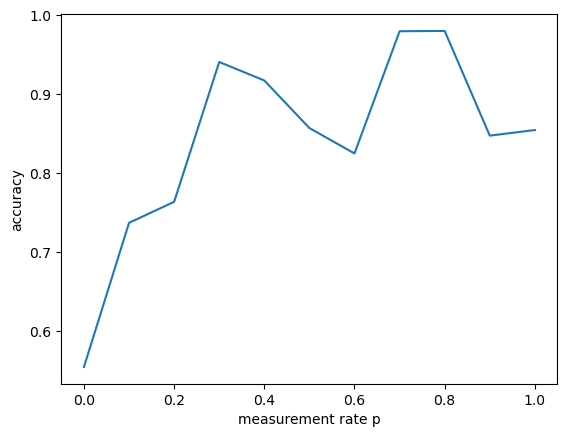

In [168]:
import matplotlib.pyplot as plt 
val_accuracy = [0.5549, 0.7372, 0.7638, 0.9407, 0.9173, 0.8571, 0.8250, 0.9796, 0.98, 0.8475, 0.8546]
# val_accuracy_0.5 = 0.8263
meas_probas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot(meas_probas, val_accuracy)
plt.xlabel('measurement rate p')
plt.ylabel('accuracy')

This will train the model for 10 epochs with a batch size of 32 and a validation split of 0.2. During training, the model will update its weights to minimize the binary crossentropy loss between the predicted output and the true output labels. Once trained, the model can be used to classify new input bitstrings by calling the predict function:

In [114]:
# Predict the output for a new input bitstring
print(len(measurement_record_1))
new_bitstring = measurement_records[102:103,:,:]
print(np.shape(new_bitstring))
predicted_output = model.predict(new_bitstring)
print(predicted_output)


99
(1, 11, 12)
1/1 [==============================] - 0s 28ms/step
[[0.9978032]]


This will return the predicted output label for the new input bitstring, which will be a value between 0 and 1 representing the probability that the blackbox function will output 1 for that input. The predicted output can be thresholded to obtain a binary classification by setting a threshold value, such as 0.5:

In [ ]:
# Threshold the predicted output to obtain a binary classification
binary_output = 1 if predicted_output >= 0.5 else 0
